### MALE FEMALE BIASES CALCULATION


In [1]:
import sys 
sys.path.append('..')

import json
import glob
import traceback
from gensim.models import KeyedVectors
from calculate_distance import CalculateDistance
from calculate_bias import calculate_bias_for_all_embedding
from utils import populate_b2e_dict_for_words, change_label_to_english_at_association
from plot_utils import get_association_subplot, get_bias_plot, get_correlation_heatmap

#CHANGE BELOW TWO LINE WITH
from word_sets_european_languages_staford_standards import european_language_word_list
MODEL_DIR = '../../word_embeddings/european/'

### load male, female & professional occupation wordlist

In [2]:
def calculate_distance_class_instance(lang):
    
    PROFESSIONAL_OCCUPATIONS = european_language_word_list[lang]['pr_occupations']
    PROFESSIONAL_OCCUPATIONS_ENGLISH = european_language_word_list['en']['pr_occupations']
    MALE_WORDS = european_language_word_list[lang]['male_words']
    FEMALE_WORDS = european_language_word_list[lang]['female_words']
    
    target_groups = [PROFESSIONAL_OCCUPATIONS]
    target_group_labels = ['professional_occupation']

    reference_groups = [MALE_WORDS, FEMALE_WORDS]
    reference_group_labels = ['male', 'female']
    
    
    print('target group -->')
    for group, labels in zip(target_groups, target_group_labels):
        print(labels, group)

    print('reference group -->')
    for group, labels in zip(reference_groups, reference_group_labels):
        print(labels, group)
    
    calculate_association_distance = CalculateDistance()
    calculate_association_distance.set_target_word_groups(target_word_groups=target_groups, target_group_labels=target_group_labels)
    calculate_association_distance.set_reference_word_groups(reference_word_groups=reference_groups, reference_group_labels=reference_group_labels)
    
    b2e_dict = populate_b2e_dict_for_words(PROFESSIONAL_OCCUPATIONS, PROFESSIONAL_OCCUPATIONS_ENGLISH)
    
    return calculate_association_distance, b2e_dict

### Calculate associations

['../../word_embeddings/european/cc.de.300.vec', '../../word_embeddings/european/cc.en.300.vec', '../../word_embeddings/european/cc.es.300.vec', '../../word_embeddings/european/cc.fr.300.vec', '../../word_embeddings/european/cc.it.300.vec', '../../word_embeddings/european/cc.ru.300.vec', '../../word_embeddings/european/cc.tr.300.vec']
target group -->
professional_occupation ['Hausmeister', 'Statistiker', 'Hebamme', 'Gerichtsvollzieher', 'Auktionator', 'Fotograf', 'Geologe', 'Schuhmacher', 'Athlet', 'Kassierer', 'Tänzer', 'Haushälterin', 'Buchhalter', 'Physiker', 'Gärtner', 'Zahnarzt', 'Weber', 'Schmied', 'Psychologe', 'Vorgesetzter', 'Mathematiker', 'Vermesser', 'Schneider', 'Designer', 'Ökonom', 'Mechaniker', 'Arbeiter', 'Postmeister', 'Makler', 'Chemiker', 'Bibliothekar', 'Begleiter', 'Büroangestellter', ' Musiker', ' Portier', ' Wissenschaftler', ' Zimmermann', ' Seemann', ' Ausbilder', ' Sheriff', ' Pilot', ' Inspektor', ' Maurer', 'Bäcker', 'Administrator', 'Architekt', 'Sammler'

Traceback (most recent call last):
  File "../calculate_distance.py", line 33, in __get_group_centroid
    word_vector = model.get_vector(word)
  File "/root/miniconda3/envs/ner/lib/python3.6/site-packages/gensim/models/keyedvectors.py", line 471, in get_vector
    return self.word_vec(word)
  File "/root/miniconda3/envs/ner/lib/python3.6/site-packages/gensim/models/keyedvectors.py", line 468, in word_vec
    raise KeyError("word '%s' not in vocabulary" % word)
KeyError: "word ' Männer' not in vocabulary"
Traceback (most recent call last):
  File "../calculate_distance.py", line 33, in __get_group_centroid
    word_vector = model.get_vector(word)
  File "/root/miniconda3/envs/ner/lib/python3.6/site-packages/gensim/models/keyedvectors.py", line 471, in get_vector
    return self.word_vec(word)
  File "/root/miniconda3/envs/ner/lib/python3.6/site-packages/gensim/models/keyedvectors.py", line 468, in word_vec
    raise KeyError("word '%s' not in vocabulary" % word)
KeyError: "word ' Junge


word  Frauen not in embedding 
word  Musiker not in embedding 
word  Portier not in embedding 
word  Wissenschaftler not in embedding 
word  Zimmermann not in embedding 
word  Seemann not in embedding 
word  Ausbilder not in embedding 
word  Sheriff not in embedding 
word  Pilot not in embedding 
word  Inspektor not in embedding 
word  Maurer not in embedding 


Traceback (most recent call last):
  File "../calculate_distance.py", line 33, in __get_group_centroid
    word_vector = model.get_vector(word)
  File "/root/miniconda3/envs/ner/lib/python3.6/site-packages/gensim/models/keyedvectors.py", line 471, in get_vector
    return self.word_vec(word)
  File "/root/miniconda3/envs/ner/lib/python3.6/site-packages/gensim/models/keyedvectors.py", line 468, in word_vec
    raise KeyError("word '%s' not in vocabulary" % word)
KeyError: "word ' Frauen' not in vocabulary"


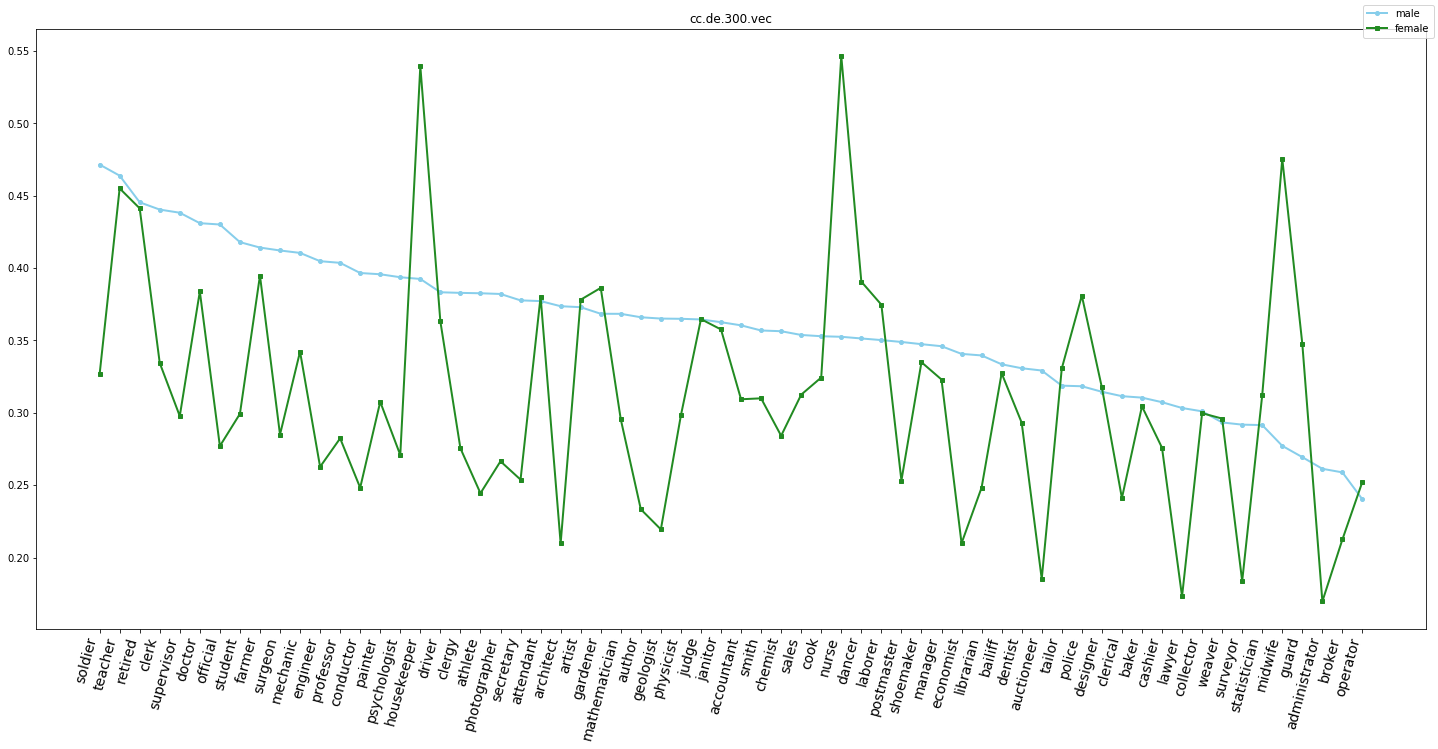

target group -->
professional_occupation ['janitor', 'statistician', 'midwife', 'bailiff', 'auctioneer', 'photographer', 'geologist', 'shoemaker', 'athlete', 'cashier', 'dancer', 'housekeeper', 'accountant', 'physicist', 'gardener', 'dentist', 'weaver', 'blacksmith', 'psychologist', 'supervisor', 'mathematician', 'surveyor', 'tailor', 'designer', 'economist', 'mechanic', 'laborer', 'postmaster', 'broker', 'chemist', 'librarian', 'attendant', 'clerical', 'musician', 'porter', 'scientist', 'carpenter', 'sailor', 'instructor', 'sheriff', 'pilot', 'inspector', 'mason', 'baker', 'administrator', 'architect', 'collector', 'operator', 'surgeon', 'driver', 'painter', 'conductor', 'nurse', 'cook', 'engineer', 'retired', 'sales', 'lawyer', 'clergy', 'physician', 'farmer', 'clerk', 'manager', 'guard', 'artist', 'smith', 'official', 'police', 'doctor', 'professor', 'student', 'judge', 'teacher', 'author', 'secretary', 'soldier']
reference group -->
male ['he', 'son', 'his', 'him', 'father', 'man',

Traceback (most recent call last):
  File "../calculate_distance.py", line 33, in __get_group_centroid
    word_vector = model.get_vector(word)
  File "/root/miniconda3/envs/ner/lib/python3.6/site-packages/gensim/models/keyedvectors.py", line 471, in get_vector
    return self.word_vec(word)
  File "/root/miniconda3/envs/ner/lib/python3.6/site-packages/gensim/models/keyedvectors.py", line 468, in word_vec
    raise KeyError("word '%s' not in vocabulary" % word)
KeyError: "word 'femen' not in vocabulary"


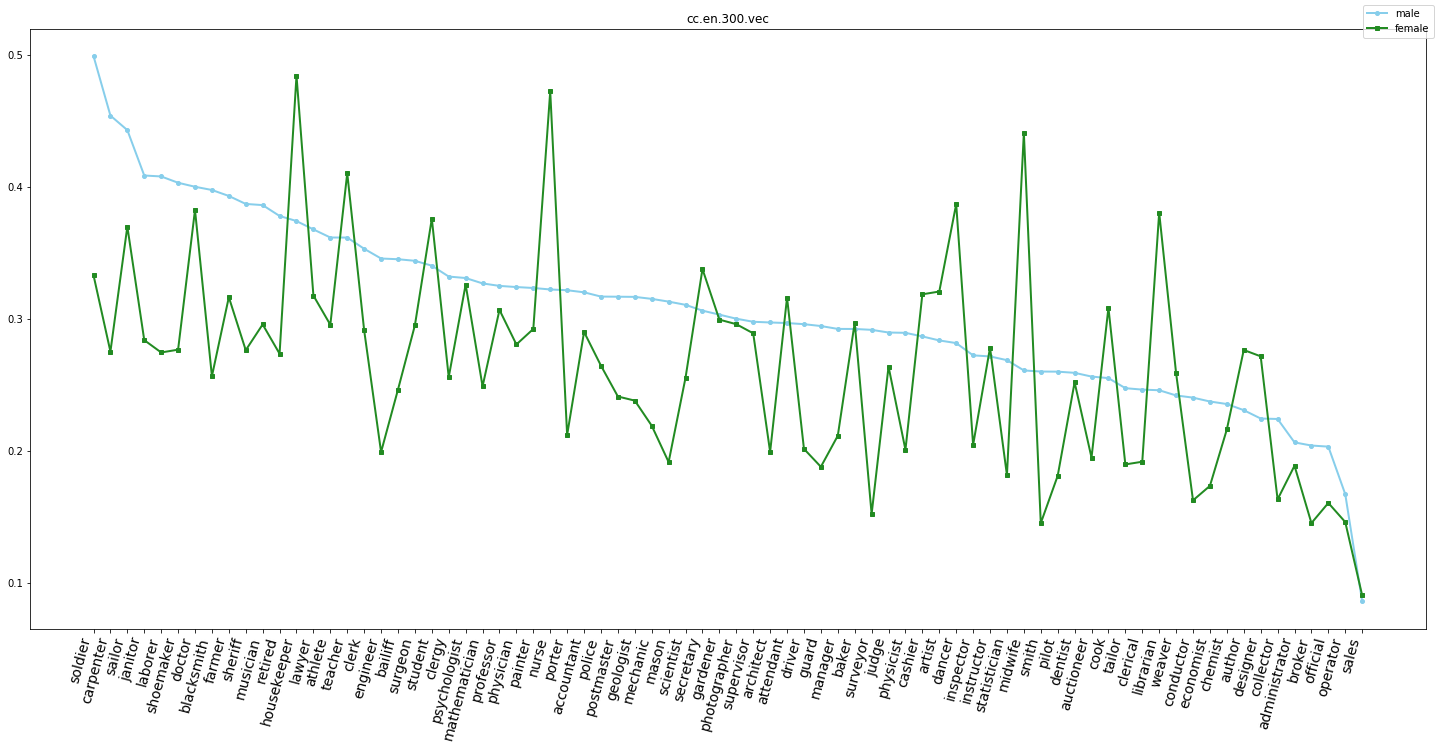

target group -->
professional_occupation ['conserje', 'estadístico', 'comadrona', 'agente judicial', 'subastador', 'fotógrafo', 'geólogo', 'zapatero', 'atleta', 'cajero', 'bailarín', 'ama de casa', 'contador', 'físico', 'jardinero', 'dentista', 'tejedor', 'herrero', 'psicólogo', 'supervisor', 'matemático', 'agrimensor', 'sastre', 'diseñador', 'economista', 'mecánico', 'trabajador', 'jefe de correos', 'corredor', 'químico', 'bibliotecario', 'asistente', 'clerical', ' músico', ' portero', ' científico', ' carpintero', ' marinero', ' instructor', ' sheriff', ' piloto', ' inspector', ' albañil', 'panadero', 'administrador', 'arquitecto', 'coleccionista', 'operador', 'cirujano', 'conductor', 'pintor', 'conductor', 'enfermero', 'cocinero', 'ingeniero', 'retirado', 'ventas', 'abogado', 'clero', 'médico', 'agricultor', 'empleado', 'gerente', 'guardia', 'artista', 'herrero', 'oficial', 'policía', 'médico', 'profesor', 'estudiante', 'juez', 'maestgunro', 'autor', 'secretario', 'soldado']
referen

Traceback (most recent call last):
  File "../calculate_distance.py", line 33, in __get_group_centroid
    word_vector = model.get_vector(word)
  File "/root/miniconda3/envs/ner/lib/python3.6/site-packages/gensim/models/keyedvectors.py", line 471, in get_vector
    return self.word_vec(word)
  File "/root/miniconda3/envs/ner/lib/python3.6/site-packages/gensim/models/keyedvectors.py", line 468, in word_vec
    raise KeyError("word '%s' not in vocabulary" % word)
KeyError: "word 'él mismo' not in vocabulary"
Traceback (most recent call last):
  File "../calculate_distance.py", line 33, in __get_group_centroid
    word_vector = model.get_vector(word)
  File "/root/miniconda3/envs/ner/lib/python3.6/site-packages/gensim/models/keyedvectors.py", line 471, in get_vector
    return self.word_vec(word)
  File "/root/miniconda3/envs/ner/lib/python3.6/site-packages/gensim/models/keyedvectors.py", line 468, in word_vec
    raise KeyError("word '%s' not in vocabulary" % word)
KeyError: "word ' homb

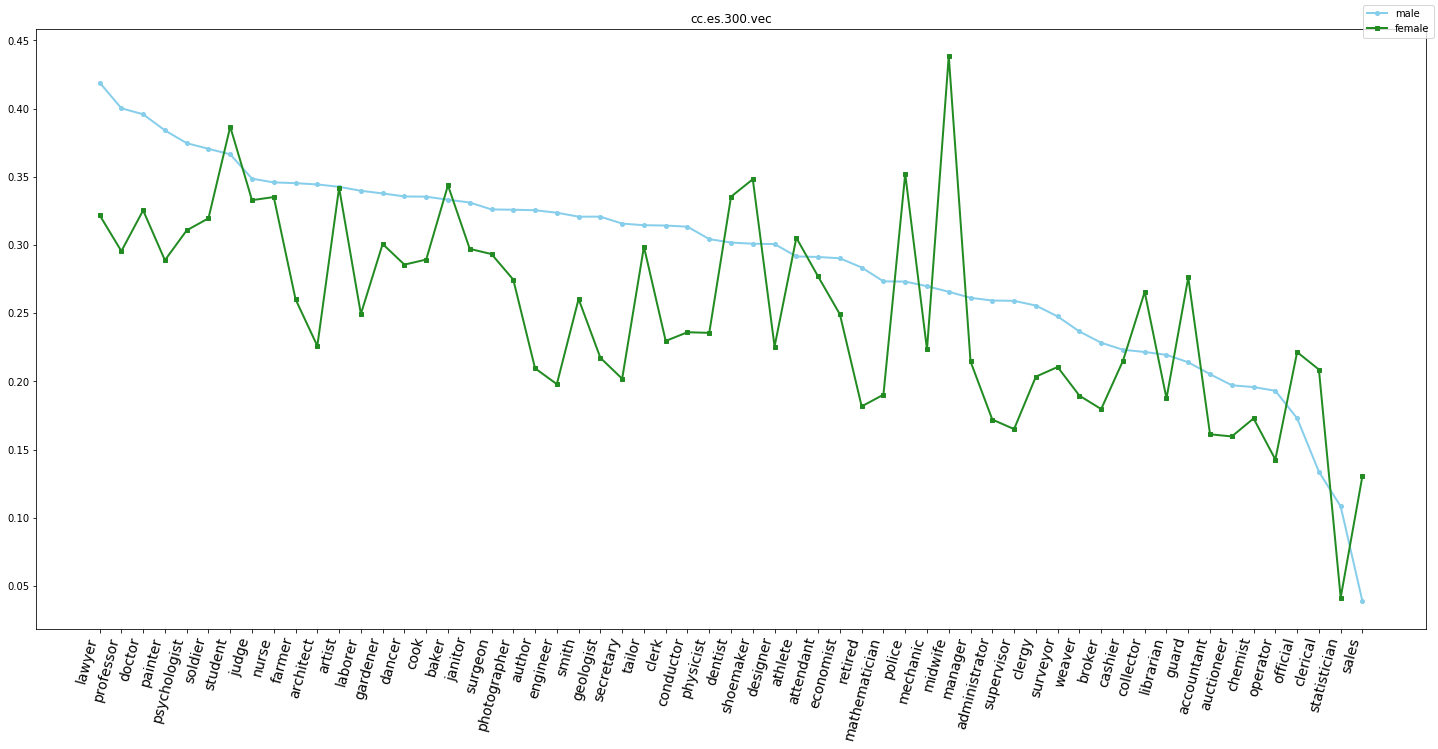

target group -->
professional_occupation ['concierge', 'statisticien', 'sage-femme', 'huissier de justice', 'commissaire-priseur', 'photographe', 'géologue', 'cordonnier', 'athlète', 'caissier', 'danseur', 'femme de ménage', 'comptable', 'physicien', 'jardinier', 'dentiste', 'tisserand', 'forgeron', 'psychologue', 'superviseur', 'mathématicien', 'arpenteur', 'tailleur', 'concepteur', 'économiste', 'mécanicien', 'ouvrier', 'maître de poste', 'courtier', 'chimiste', 'bibliothécaire', 'préposé', 'commis de bureau', ' musicien', ' porter', ' scientifique', ' charpentier', ' marin', ' instructeur', ' shérif', ' pilote', ' inspecteur', ' maçon', 'boulanger', 'administrateur', 'architecte', 'collectionneur', 'opérateur', 'chirurgien', 'chauffeur', 'peintre', "chef d'orchestre", 'infirmier', 'cuisinier', 'ingénieur', 'retraité', 'vente', 'avocat', 'clergé', 'médecin', 'agriculteur', 'commis', 'gestionnaire', 'garde', 'artiste', 'forgeron', 'officiel', 'police', 'médecin', 'professeur', 'étudia

Traceback (most recent call last):
  File "../calculate_distance.py", line 33, in __get_group_centroid
    word_vector = model.get_vector(word)
  File "/root/miniconda3/envs/ner/lib/python3.6/site-packages/gensim/models/keyedvectors.py", line 471, in get_vector
    return self.word_vec(word)
  File "/root/miniconda3/envs/ner/lib/python3.6/site-packages/gensim/models/keyedvectors.py", line 468, in word_vec
    raise KeyError("word '%s' not in vocabulary" % word)
KeyError: "word ' hommes' not in vocabulary"
Traceback (most recent call last):
  File "../calculate_distance.py", line 33, in __get_group_centroid
    word_vector = model.get_vector(word)
  File "/root/miniconda3/envs/ner/lib/python3.6/site-packages/gensim/models/keyedvectors.py", line 471, in get_vector
    return self.word_vec(word)
  File "/root/miniconda3/envs/ner/lib/python3.6/site-packages/gensim/models/keyedvectors.py", line 468, in word_vec
    raise KeyError("word '%s' not in vocabulary" % word)
KeyError: "word ' femme

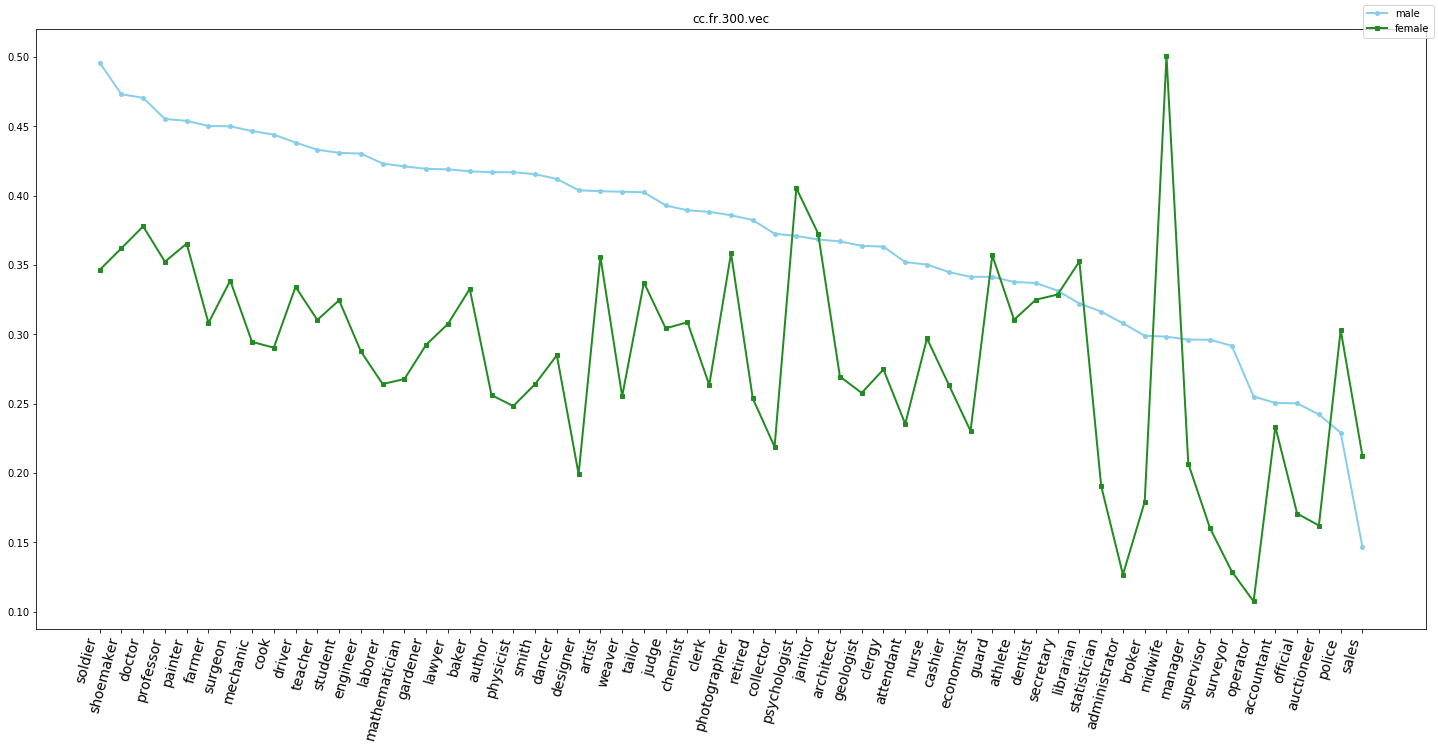

target group -->
professional_occupation ['bidello', 'statistico', 'ostetrica', 'ufficiale giudiziario', 'banditore', 'fotografo', 'geologo', 'calzolaio', 'atleta', 'cassiere', 'ballerino', 'governante', 'contabile', 'fisico', 'giardiniere', 'dentista', 'tessitore', 'fabbro', 'psicologo', 'supervisore', 'matematico', 'geometra', 'sarto', 'designer', 'economista', 'meccanico', 'operaio', 'postmaster', 'broker', 'chimico', 'bibliotecario', 'assistente', 'clericale', ' musicista', ' portiere', ' scienziato', ' carpentiere', ' marinaio', ' istruttore', ' sceriffo', ' pilota', ' ispettore', ' muratore', 'fornaio', 'amministratore', 'architetto', 'collezionista', 'operatore', 'chirurgo', 'autista', 'pittore', 'direttore', 'infermiere', 'cuoco', 'ingegnere', 'pensionato', 'vendite', 'avvocato', 'clero', 'medico', 'agricoltore', 'impiegato', 'direttore', 'guardia', 'artista', 'fabbro', 'ufficiale', 'polizia', 'medico', 'professore', 'studente', 'giudice', 'insegnante', 'autore', 'segretario', 

Traceback (most recent call last):
  File "../calculate_distance.py", line 33, in __get_group_centroid
    word_vector = model.get_vector(word)
  File "/root/miniconda3/envs/ner/lib/python3.6/site-packages/gensim/models/keyedvectors.py", line 471, in get_vector
    return self.word_vec(word)
  File "/root/miniconda3/envs/ner/lib/python3.6/site-packages/gensim/models/keyedvectors.py", line 468, in word_vec
    raise KeyError("word '%s' not in vocabulary" % word)
KeyError: "word 'se stesso' not in vocabulary"
Traceback (most recent call last):
  File "../calculate_distance.py", line 33, in __get_group_centroid
    word_vector = model.get_vector(word)
  File "/root/miniconda3/envs/ner/lib/python3.6/site-packages/gensim/models/keyedvectors.py", line 471, in get_vector
    return self.word_vec(word)
  File "/root/miniconda3/envs/ner/lib/python3.6/site-packages/gensim/models/keyedvectors.py", line 468, in word_vec
    raise KeyError("word '%s' not in vocabulary" % word)
KeyError: "word ' uom


word  carpentiere not in embedding 
word  marinaio not in embedding 
word  istruttore not in embedding 
word  sceriffo not in embedding 
word  pilota not in embedding 
word  ispettore not in embedding 
word  muratore not in embedding 
word se stessa not in embedding 
word  donne not in embedding 
word ufficiale giudiziario not in embedding 
word  musicista not in embedding 
word  portiere not in embedding 
word  scienziato not in embedding 
word  carpentiere not in embedding 
word  marinaio not in embedding 
word  istruttore not in embedding 
word  sceriffo not in embedding 
word  pilota not in embedding 
word  ispettore not in embedding 
word  muratore not in embedding 


Traceback (most recent call last):
  File "../calculate_distance.py", line 33, in __get_group_centroid
    word_vector = model.get_vector(word)
  File "/root/miniconda3/envs/ner/lib/python3.6/site-packages/gensim/models/keyedvectors.py", line 471, in get_vector
    return self.word_vec(word)
  File "/root/miniconda3/envs/ner/lib/python3.6/site-packages/gensim/models/keyedvectors.py", line 468, in word_vec
    raise KeyError("word '%s' not in vocabulary" % word)
KeyError: "word 'se stessa' not in vocabulary"
Traceback (most recent call last):
  File "../calculate_distance.py", line 33, in __get_group_centroid
    word_vector = model.get_vector(word)
  File "/root/miniconda3/envs/ner/lib/python3.6/site-packages/gensim/models/keyedvectors.py", line 471, in get_vector
    return self.word_vec(word)
  File "/root/miniconda3/envs/ner/lib/python3.6/site-packages/gensim/models/keyedvectors.py", line 468, in word_vec
    raise KeyError("word '%s' not in vocabulary" % word)
KeyError: "word ' don

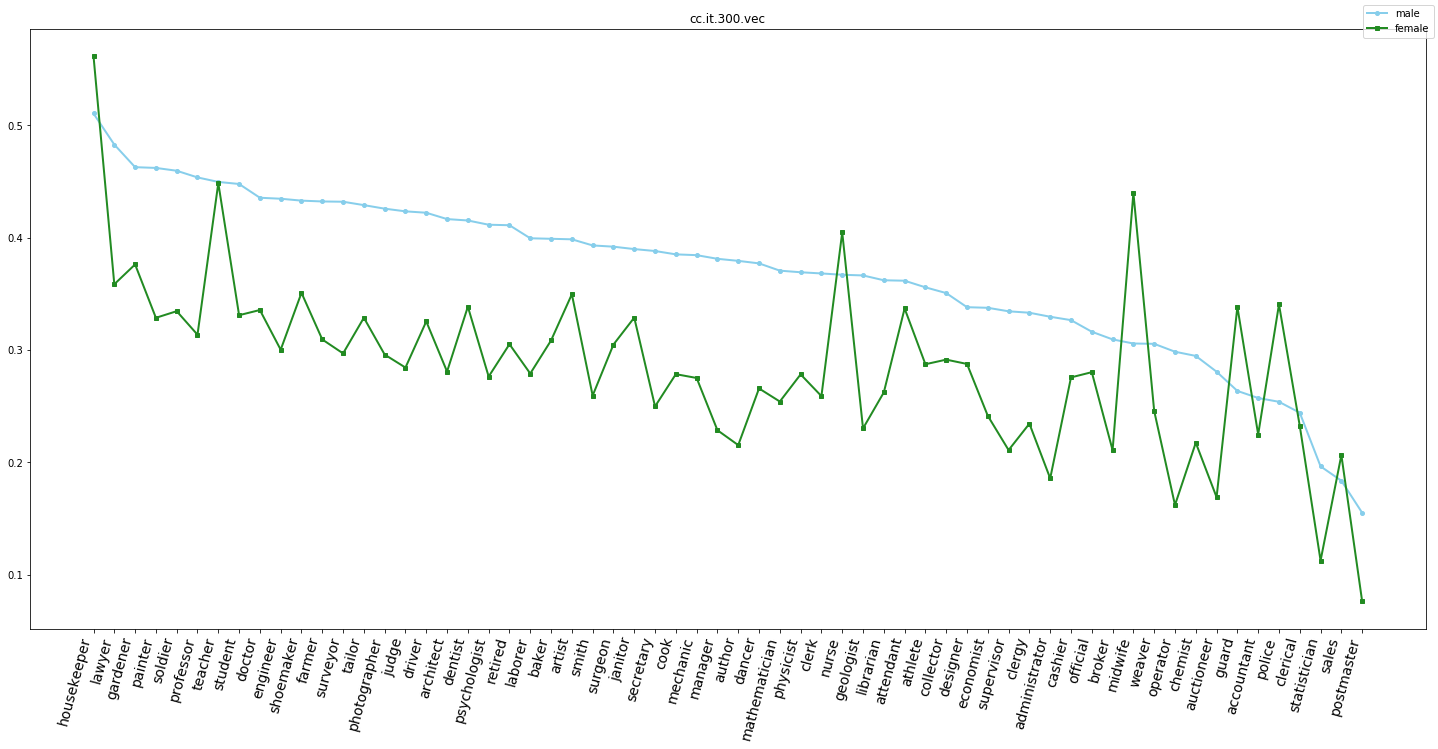

target group -->
professional_occupation ['уборщик', 'статистика', 'акушерка', 'судебный пристав', 'аукционист', 'фотограф', 'геолог', 'сапожник', 'спортсмен', 'кассир', 'танцор', 'экономка', 'бухгалтер', 'физик', 'садовник', 'стоматолог', 'ткач', 'кузнец', 'психолог', 'супервайзер', 'математик', 'инспектор', 'портной', 'дизайнер', 'экономист', 'механик', 'рабочий', 'почтмейстер', 'брокер', 'химик', 'библиотекарь', 'служитель', 'канцелярский', ' музыкант', ' портер', ' ученый', ' плотник', ' моряк', ' инструктор', ' шериф', ' пилот', ' инспектор', ' каменщик', 'пекарь', 'администратор', 'архитектор', 'коллекционер', 'оператор', 'хирург', 'водитель', 'художник', 'проводник', 'медсестра', 'повар', 'инженер', 'на пенсии', 'продажи', 'юрист', 'духовенство', 'врач', 'фермер', 'клерк', 'менеджер', 'охрана', 'художник', 'кузнец', 'чиновник', 'полиция', 'доктор', 'профессор', 'студент', 'судья', 'учитель', 'автор', 'секретарь', 'солдат']
reference group -->
male ['он', 'сын', 'его', 'его', 'от

Traceback (most recent call last):
  File "../calculate_distance.py", line 33, in __get_group_centroid
    word_vector = model.get_vector(word)
  File "/root/miniconda3/envs/ner/lib/python3.6/site-packages/gensim/models/keyedvectors.py", line 471, in get_vector
    return self.word_vec(word)
  File "/root/miniconda3/envs/ner/lib/python3.6/site-packages/gensim/models/keyedvectors.py", line 468, in word_vec
    raise KeyError("word '%s' not in vocabulary" % word)
KeyError: "word ' мужчины' not in vocabulary"
Traceback (most recent call last):
  File "../calculate_distance.py", line 33, in __get_group_centroid
    word_vector = model.get_vector(word)
  File "/root/miniconda3/envs/ner/lib/python3.6/site-packages/gensim/models/keyedvectors.py", line 471, in get_vector
    return self.word_vec(word)
  File "/root/miniconda3/envs/ner/lib/python3.6/site-packages/gensim/models/keyedvectors.py", line 468, in word_vec
    raise KeyError("word '%s' not in vocabulary" % word)
KeyError: "word ' маль

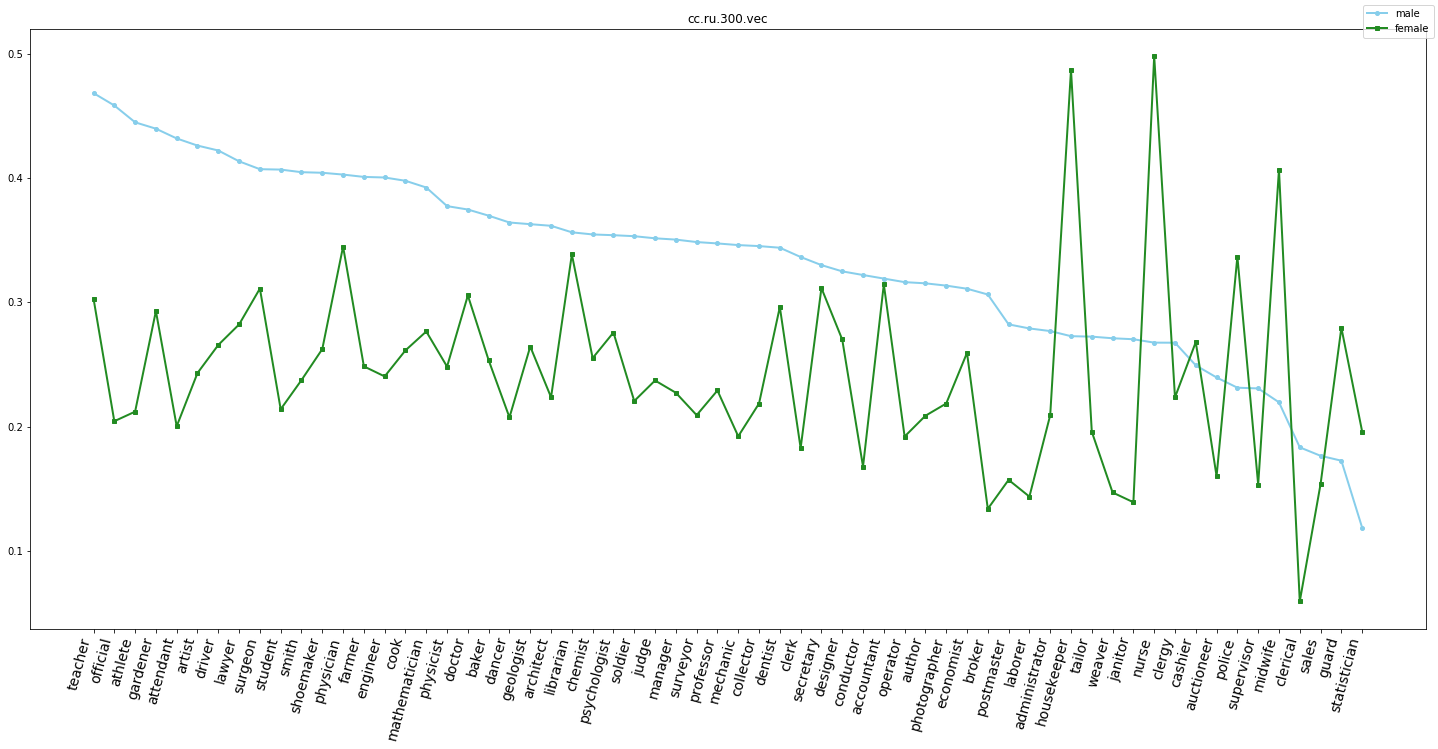

target group -->
professional_occupation ['hademe', 'istatistikçi', 'ebe', 'icra memuru', 'müzayede', 'fotoğrafçı', 'jeolog', 'kunduracı', 'atlet', 'kasiyer', 'dansçı', 'hizmetçi', 'muhasebeci', 'fizikçi', 'bahçıvan', 'diş hekimi', 'dokumacı', 'demirci', 'psikolog', 'danışman', 'matematikçi', 'sörveyör', 'terzi', 'tasarımcı', 'ekonomist', 'mekanik', 'işçi', 'postmaster', 'broker', 'kimyacı', 'kütüphaneci', 'görevli', 'büro', ' müzisyen', ' bekçi', ' bilim adamı', ' marangoz', ' denizci', ' eğitmen', ' şerif', ' pilot', ' müfettiş', ' mason', 'fırıncı', 'yönetici', 'mimar', 'toplayıcı', 'operatör', 'cerrah', 'sürücü', 'ressam', 'orkestra şefi', 'hemşire', 'aşçı', 'mühendis', 'emekli', 'satış', 'avukat', 'din adamları', 'doktor', 'çiftçi', 'katip', 'yönetici', 'bekçi', 'sanatçı', 'smith', 'resmi', 'polis', ' doktor', 'profesör', 'öğrenci', 'yargıç', 'öğretmen', 'yazar', 'sekreter', 'asker']
reference group -->
male ['o', 'oğul', 'onun', 'onu', 'baba', 'adam', 'oğlan', 'kendisi', 'erkek',

Traceback (most recent call last):
  File "../calculate_distance.py", line 33, in __get_group_centroid
    word_vector = model.get_vector(word)
  File "/root/miniconda3/envs/ner/lib/python3.6/site-packages/gensim/models/keyedvectors.py", line 471, in get_vector
    return self.word_vec(word)
  File "/root/miniconda3/envs/ner/lib/python3.6/site-packages/gensim/models/keyedvectors.py", line 468, in word_vec
    raise KeyError("word '%s' not in vocabulary" % word)
KeyError: "word 'erkek kardeş' not in vocabulary"
Traceback (most recent call last):
  File "../calculate_distance.py", line 33, in __get_group_centroid
    word_vector = model.get_vector(word)
  File "/root/miniconda3/envs/ner/lib/python3.6/site-packages/gensim/models/keyedvectors.py", line 471, in get_vector
    return self.word_vec(word)
  File "/root/miniconda3/envs/ner/lib/python3.6/site-packages/gensim/models/keyedvectors.py", line 468, in word_vec
    raise KeyError("word '%s' not in vocabulary" % word)
KeyError: "word ' 

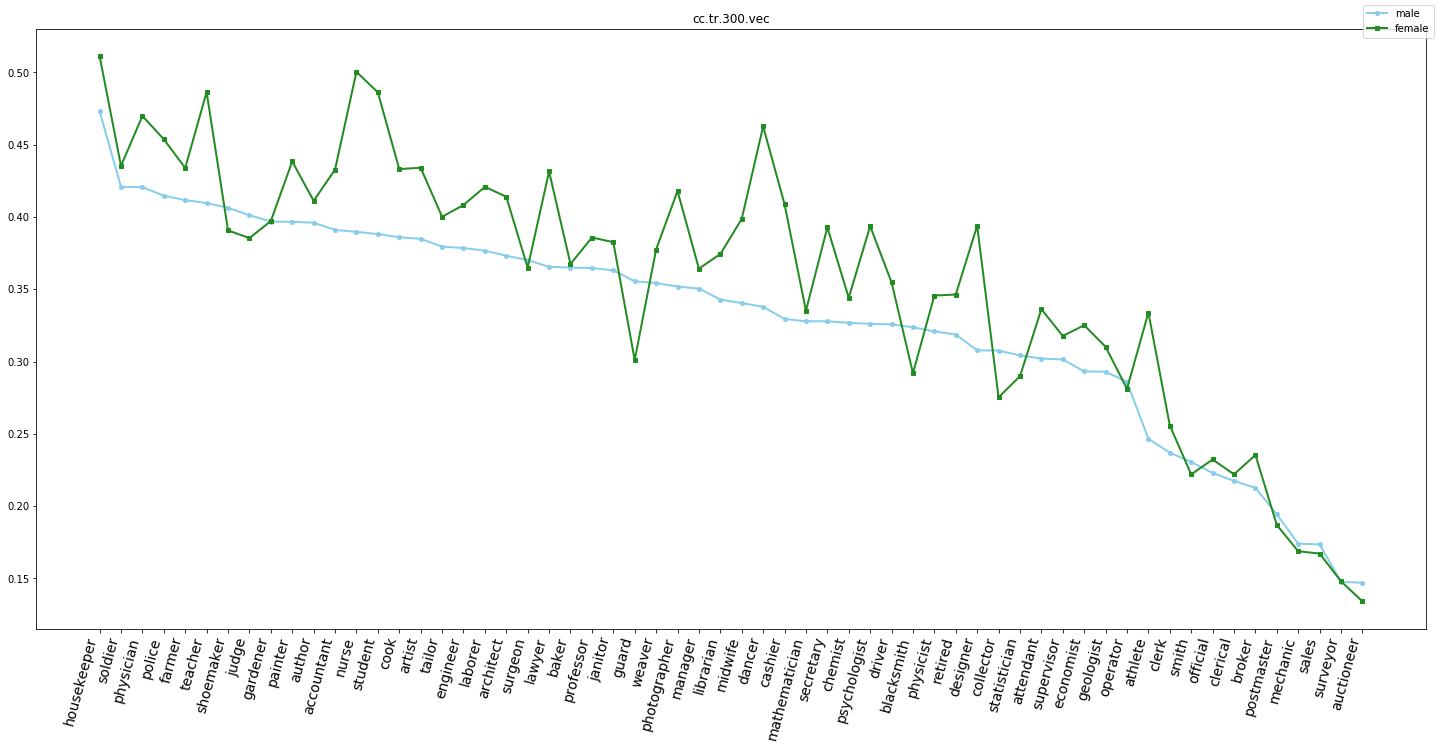

In [3]:
association_dict = {}
model_dir = MODEL_DIR
filenames = glob.glob(model_dir + '*')
print(filenames)
for filename in filenames:
    embedding_name = filename.split('/')[-1]
    lang_name = embedding_name.split('.')[1]
    calculate_association_distance, b2e_dict = calculate_distance_class_instance(lang_name)
    target_wise_association_for_this_paper = {}
    if embedding_name.split('.')[-1] == 'bin':
        model = KeyedVectors.load_word2vec_format(filename, binary=True)
    else:
        model = KeyedVectors.load_word2vec_format(filename, binary=False)
    target_wise_association_for_this_embedding = calculate_association_distance.get_association_for_provided_embedding(model=model)
    target_wise_association_for_this_embedding = change_label_to_english_at_association(target_wise_association_for_this_embedding, b2e_dict)
    association_dict[embedding_name] = target_wise_association_for_this_embedding
    
    
    get_association_subplot(target_wise_association_for_this_paper=target_wise_association_for_this_embedding, b2e_dict = b2e_dict, title= embedding_name)


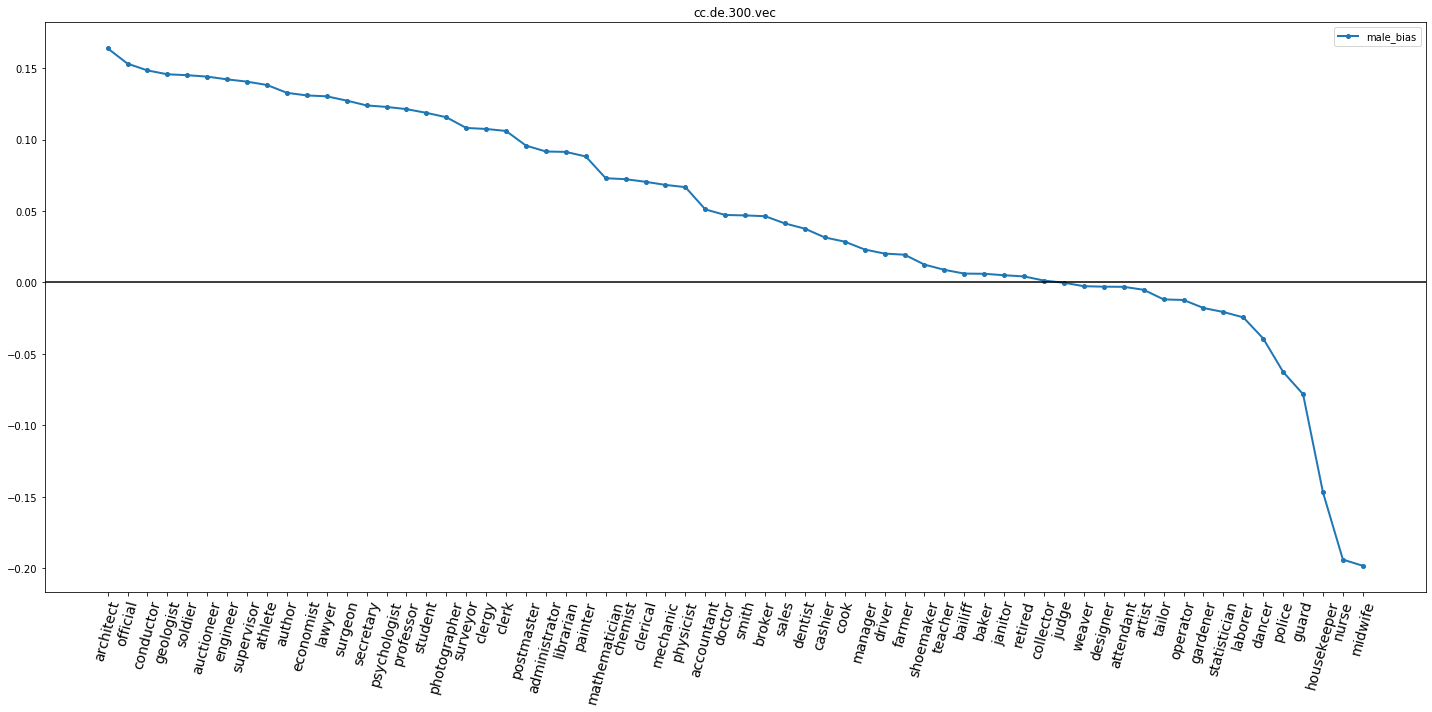

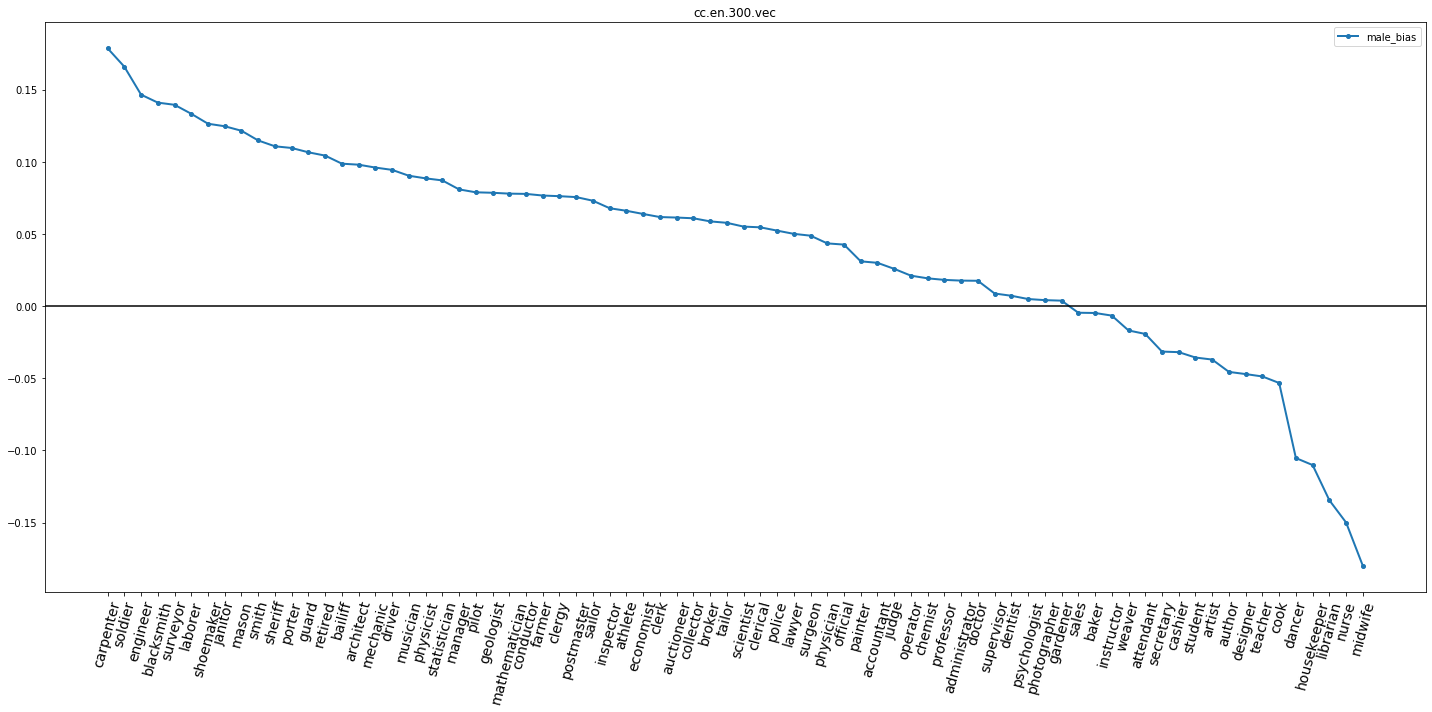

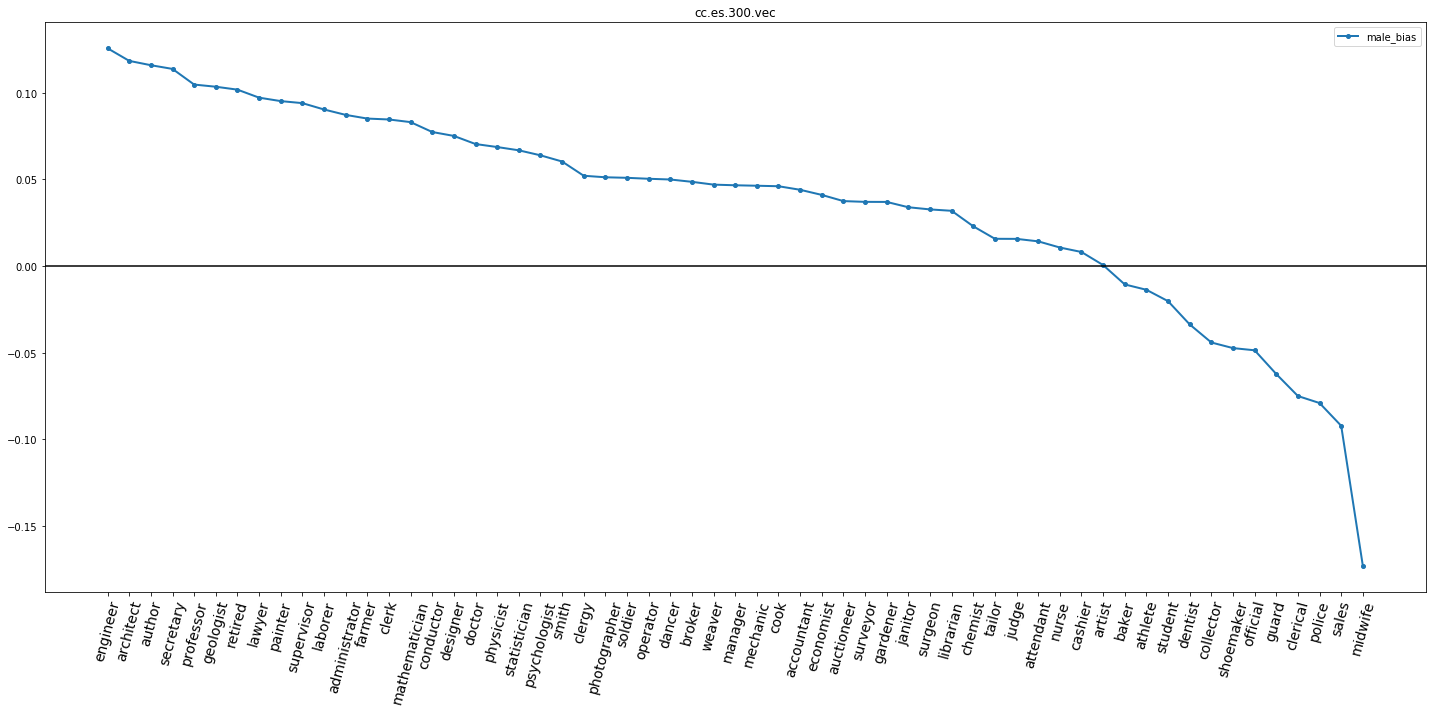

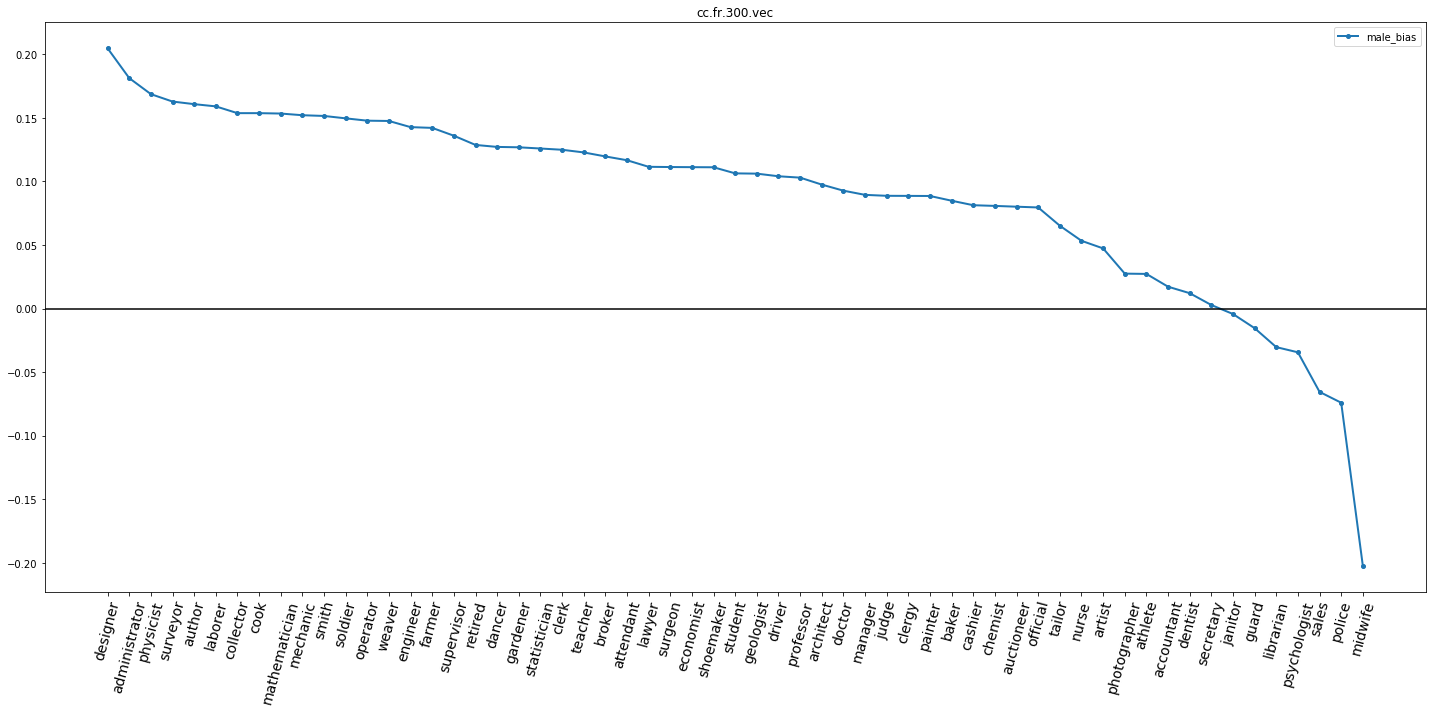

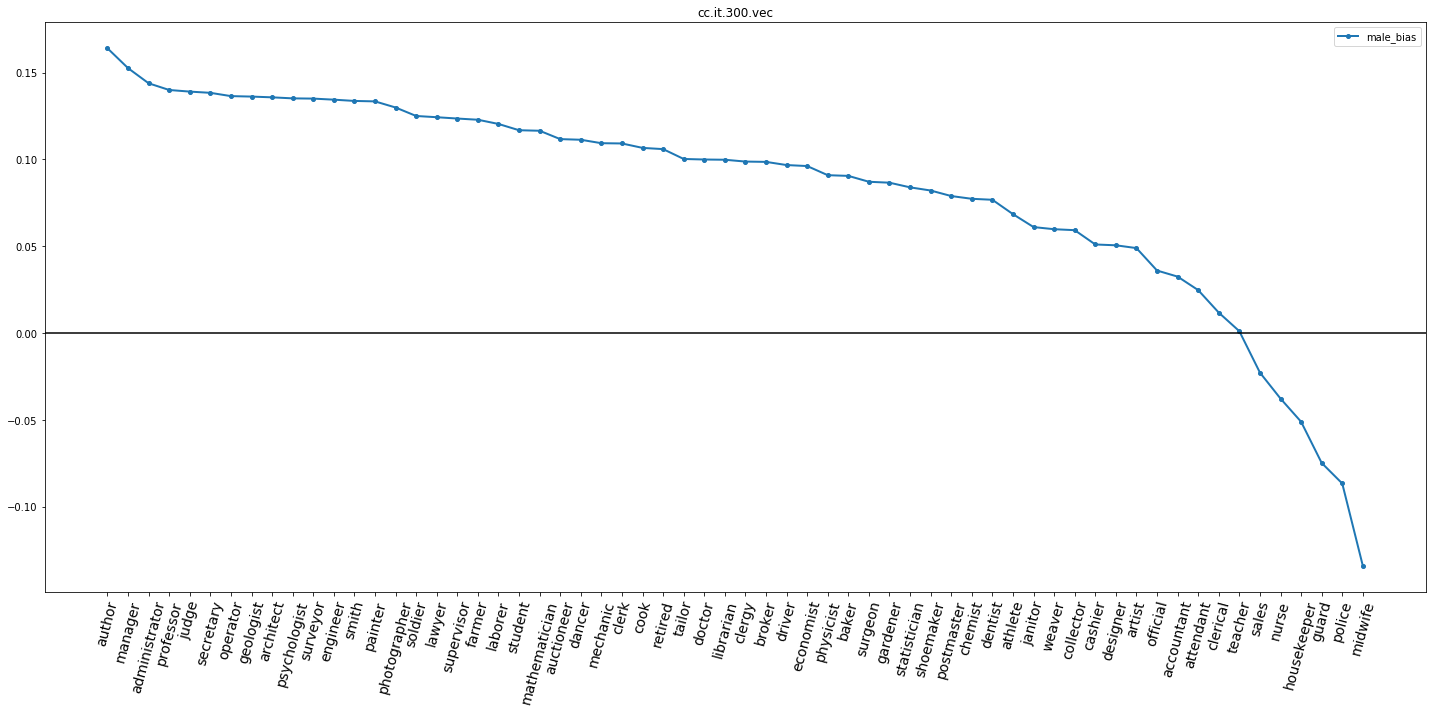

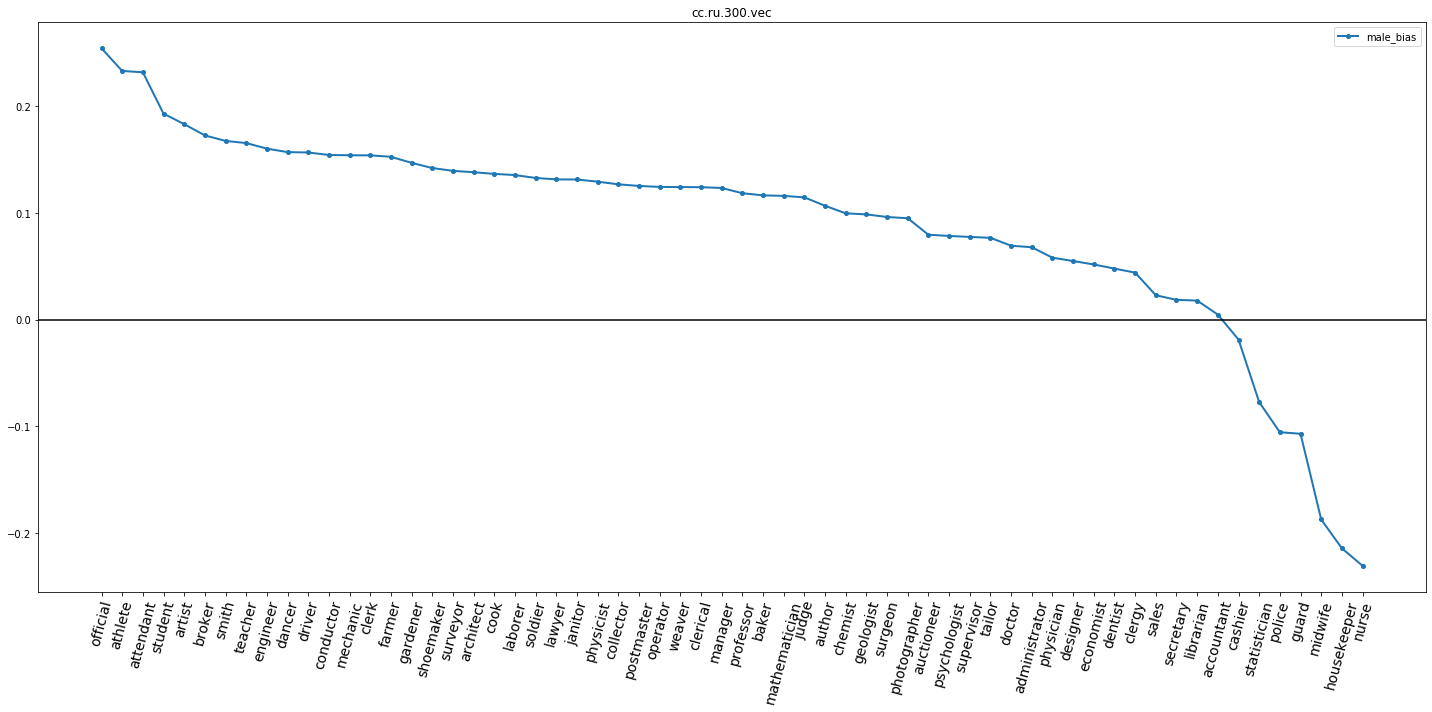

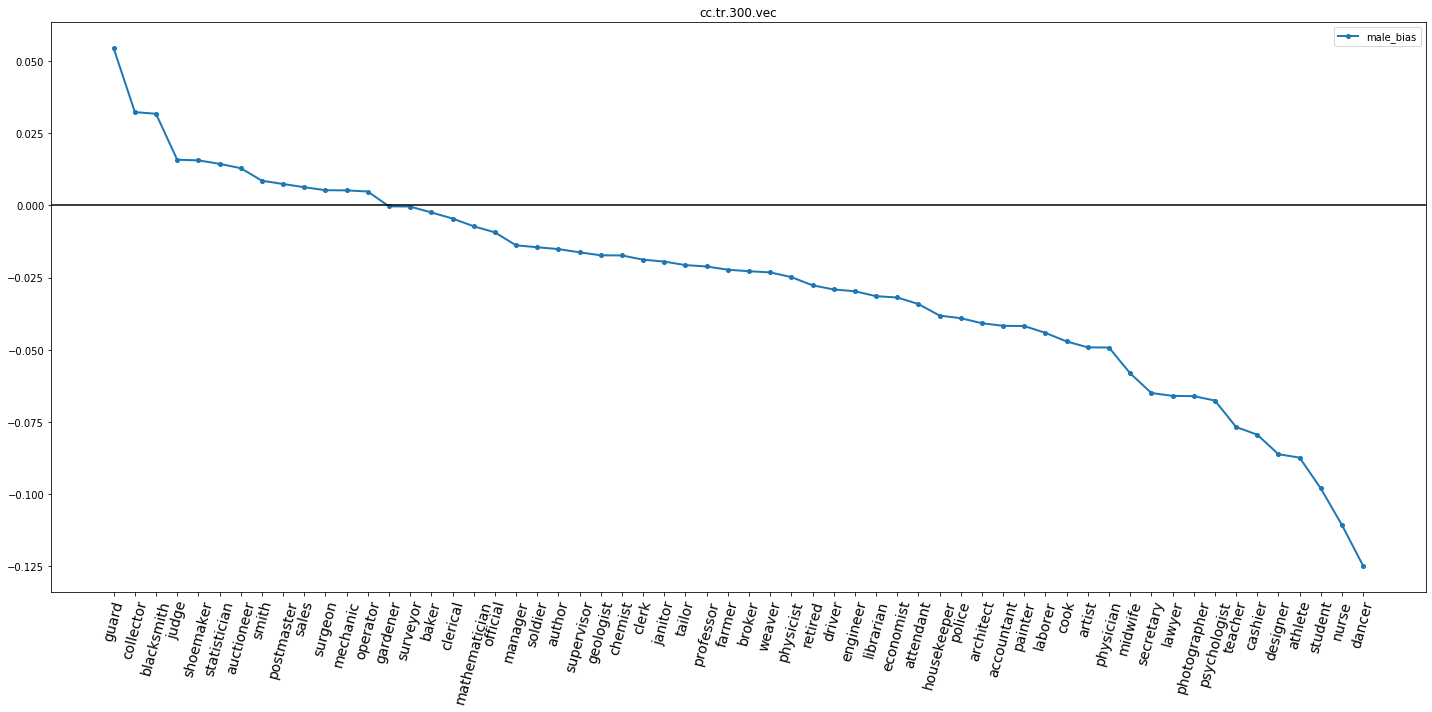

In [4]:
from plot_utils import get_bias_plot
female_bias_dict_for_all_embeddings = calculate_bias_for_all_embedding(association_dict=association_dict, 
                                                                     target_label = 'professional_occupation', 
                                                                     reference_labels = ['male', 'female'])

get_bias_plot(bias_dict=female_bias_dict_for_all_embeddings, b2e_dict=b2e_dict, bias_label = 'male_bias')

                 cc.de.300.vec    cc.en.300.vec    cc.es.300.vec  \
accountant       [0.051078916]    [0.029993057]    [0.044060037]   
administrator    [0.091609076]    [0.017676383]    [0.087277755]   
architect          [0.1638336]    [0.097974166]     [0.11843076]   
artist          [-0.005158186]    [-0.03701383]  [0.00061404705]   
athlete           [0.13815019]     [0.06604004]   [-0.013638586]   
attendant      [-0.0030828714]   [-0.019273221]    [0.014310211]   
auctioneer        [0.14400543]      [0.0613558]    [0.037533358]   
author            [0.13266622]   [-0.045563668]     [0.11593388]   
bailiff          [0.006175369]      [0.0986743]              NaN   
baker            [0.006032914]  [-0.0047514737]   [-0.010542661]   
blacksmith                 NaN     [0.14097664]              NaN   
broker            [0.04633054]    [0.058709398]    [0.048657313]   
carpenter                  NaN     [0.17861801]              NaN   
cashier          [0.031445503]   [-0.031882763] 

/root/miniconda3/envs/ner/lib/python3.6/site-packages/seaborn/matrix.py:288: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/root/miniconda3/envs/ner/lib/python3.6/site-packages/seaborn/matrix.py:288: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


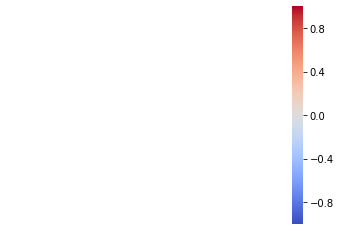

In [7]:
import pandas as pd
df = pd.DataFrame.from_dict(female_bias_dict_for_all_embeddings)
print(df)
get_correlation_heatmap(df=df)
